# Analyse av data om EHF fra ELMA med data i Enhetsregisteret
I denne analysen bruker vi data fra Enhetsregisteret og data fra ELMA som allerede er lastet ned og konvertert til parquet.

TODO: Denne trenger en gjennomgang usikker på om den virker.

In [2]:
%pip install pandas

  Using cached pandas-1.3.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached numpy-1.21.4-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
Note: you may need to restart the kernel to use updated packages.


Når verktøyene er installert, kan vi straks starte å kode. Og den første koden vi må skrive er beskjeden om å bruke pandas i denne notebook-en:

In [1]:
import pandas as pd

For å lese parquet-filer er Pandas avhengig av et tilleggsverktøy. Her har jeg valgt pyarrow, som er et av alternativene:

In [8]:
%pip install pyarrow

  Using cached pyarrow-6.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25.6 MB)
Note: you may need to restart the kernel to use updated packages.


Spørsmålet er nå, hvis vi leser den nye fila, vil den automatisk få riktig datatyper da?

In [30]:
enheter = pd.read_parquet('enheter_alle_forbedret.parquet')

In [31]:
enheter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 43 columns):
 #   Column                                        Non-Null Count    Dtype         
---  ------                                        --------------    -----         
 0   Organisasjonsnummer                           1048575 non-null  object        
 1   Navn                                          1048575 non-null  object        
 2   Organisasjonsform.kode                        1048575 non-null  category      
 3   Organisasjonsform.beskrivelse                 1048575 non-null  category      
 4   Næringskode 1                                 1048575 non-null  object        
 5   Næringskode 1.beskrivelse                     1048575 non-null  object        
 6   Næringskode 2                                 1048575 non-null  object        
 7   Næringskode 2.beskrivelse                     1048575 non-null  object        
 8   Næringskode 3                             

## Kombinere med EHF-data
La oss se hva vi kan få ut av å se på data om EHF.

In [33]:
ehf = pd.read_parquet('/home/wslstsk/projects/nsg/sa1/statistikk/2021-11-26 mottakere ehf.parquet')

In [34]:
ehf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217816 entries, 69286 to 323900
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   identifier                    217816 non-null  int64         
 1   regdate                       217816 non-null  datetime64[ns]
 2   PEPPOLBIS_3_0_BILLING_01_UBL  217816 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 5.2 MB


In [37]:
enheter = enheter.set_index('Organisasjonsnummer')

In [39]:
ehf['identifier'].rename('Organisasjonsnummer')

69286     976162242
69287     991825126
69288     995856166
69289     979537158
69290     986200320
            ...    
323896    990979421
323897    928003027
323898    958371438
323899    927967987
323900    926946021
Name: Organisasjonsnummer, Length: 217816, dtype: int64

In [42]:
ehf = ehf.set_index('identifier')

In [48]:
ehf.index = ehf.index.rename('Organisasjonsnummer')

In [54]:
ehf.index = ehf.index.astype('str')

In [49]:
ehf

,regdate,PEPPOLBIS_3_0_BILLING_01_UBL
Organisasjonsnummer,,
976162242,2018-11-14,Ja
991825126,2018-11-14,Ja
995856166,2018-11-14,Ja
979537158,2018-11-14,Ja
986200320,2018-11-14,Ja
...,...,...
990979421,2021-11-26,Ja
928003027,2021-11-26,Ja
958371438,2021-11-26,Ja


In [57]:
ehf = ehf.rename(columns={'regdate': 'Registrert i ELMA', 'PEPPOLBIS_3_0_BILLING_01_UBL': 'EHF'})

In [59]:
enheter_ehf = enheter.merge(ehf, on='Organisasjonsnummer', how='left')

In [72]:
enheter_ehf

,Navn,Organisasjonsform.kode,Organisasjonsform.beskrivelse,Næringskode 1,Næringskode 1.beskrivelse,Næringskode 2,Næringskode 2.beskrivelse,Næringskode 3,Næringskode 3.beskrivelse,Hjelpeenhetskode,...,Registrert i Frivillighetsregisteret,Registrert i Foretaksregisteret,Registrert i Stiftelsesregisteret,Konkurs,Under avvikling,Under tvangsavvikling eller tvangsoppløsning,Overordnet enhet i offentlig sektor,Målform,Registrert i ELMA,EHF
Organisasjonsnummer,,,,,,,,,,,,,,,,,,,,,
922924368,- A THOUSAND WORDS - ØDEGÅRDEN GJERRUD TRANSLA...,ENK,Enkeltpersonforetak,74.3,Oversettelses- og tolkevirksomhet,nan,None,nan,None,NaN,...,NEI,NEI,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN
916627939,- P A L M E R A -,FLI,Forening/lag/innretning,94.991,Aktiviteter i andre interesseorganisasjoner ik...,nan,None,nan,None,NaN,...,NEI,NEI,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN
911963582,- TTT- WINES TORE EUGEN KRISTIANSEN,ENK,Enkeltpersonforetak,46.341,Engroshandel med vin og brennevin,nan,None,nan,None,NaN,...,NEI,NEI,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN
922936919,-VEIEN- MED ANITA HELLEBØ-STOREIDE,ENK,Enkeltpersonforetak,96.09,Personlig tjenesteyting ikke nevnt annet sted,nan,None,nan,None,NaN,...,NEI,JA,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN
990730253,://ART OF DESIGN//: Lars Thomas Evensen,ENK,Enkeltpersonforetak,62.02,Konsulentvirksomhet tilknyttet informasjonstek...,nan,None,nan,None,NaN,...,NEI,NEI,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828008242,TO MED HAMMEREN - LILLESVEEN,ENK,Enkeltpersonforetak,41.2,Oppføring av bygninger,nan,None,nan,None,NaN,...,NEI,NEI,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN
997323297,TOBAKSHULLET BÅTFORENING,FLI,Forening/lag/innretning,94.991,Aktiviteter i andre interesseorganisasjoner ik...,nan,None,nan,None,NaN,...,JA,NEI,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN
889213612,TOEN AS,AS,Aksjeselskap,64.308,Investeringsselskaper og lignende lukket for a...,nan,None,nan,None,NaN,...,NEI,JA,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN


In [75]:
enheter_ehf[enheter_ehf['EHF']=='Ja']['Registrert i ELMA'] - enheter_ehf[enheter_ehf['EHF']=='Ja']['Registreringsdato i Enhetsregisteret']

Organisasjonsnummer
820406702    585 days
918001298   1490 days
926781073     12 days
925432466     25 days
924829214     51 days
               ...   
918607803    851 days
992976942   3882 days
927456303     92 days
917579768   1589 days
992953004   4575 days
Length: 211610, dtype: timedelta64[ns]

In [69]:
enheter_ehf['Registrert i ELMA'].describe()

/tmp/ipykernel_20463/592800399.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  enheter_ehf['Registrert i ELMA'].describe()


count                  211610
unique                   1041
top       2019-06-14 00:00:00
freq                    17730
first     2018-11-10 00:00:00
last      2021-11-26 00:00:00
Name: Registrert i ELMA, dtype: object

### Analyse
1) Lage en subset av enheter_ehf med enheter registrert _etter_ 2018-11-10, som er første dato for registrering  i ELMA.
2) Legge til en kolonne som er differensen mellom registreringsdato i ELMA og registreringsdato i enhetsregisteret



In [77]:
nye_enheter = enheter_ehf[enheter_ehf['Registreringsdato i Enhetsregisteret']>'2018-11-11']

In [80]:
nye_enheter.loc[:,'Diff ELMA ER'] = nye_enheter['Registrert i ELMA'] - nye_enheter['Registreringsdato i Enhetsregisteret']

/home/wslstsk/projects/kurs/parquet_demo/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [81]:
nye_enheter

,Navn,Organisasjonsform.kode,Organisasjonsform.beskrivelse,Næringskode 1,Næringskode 1.beskrivelse,Næringskode 2,Næringskode 2.beskrivelse,Næringskode 3,Næringskode 3.beskrivelse,Hjelpeenhetskode,...,Registrert i Foretaksregisteret,Registrert i Stiftelsesregisteret,Konkurs,Under avvikling,Under tvangsavvikling eller tvangsoppløsning,Overordnet enhet i offentlig sektor,Målform,Registrert i ELMA,EHF,Diff ELMA ER
Organisasjonsnummer,,,,,,,,,,,,,,,,,,,,,
922924368,- A THOUSAND WORDS - ØDEGÅRDEN GJERRUD TRANSLA...,ENK,Enkeltpersonforetak,74.3,Oversettelses- og tolkevirksomhet,nan,None,nan,None,NaN,...,NEI,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN,NaT
922936919,-VEIEN- MED ANITA HELLEBØ-STOREIDE,ENK,Enkeltpersonforetak,96.09,Personlig tjenesteyting ikke nevnt annet sted,nan,None,nan,None,NaN,...,JA,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN,NaT
927379759,... IN NORWAY CATO CHRISTENSEN,ENK,Enkeltpersonforetak,79.11,Reisebyråvirksomhet,nan,None,nan,None,NaN,...,NEI,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN,NaT
922165386,.ZIP COLLECTIVE,FLI,Forening/lag/innretning,94.991,Aktiviteter i andre interesseorganisasjoner ik...,nan,None,nan,None,NaN,...,NEI,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN,NaT
927573318,(NYE) KRISTIANSUND TAUBÅTSERVICE AS,AS,Aksjeselskap,nan,None,nan,None,nan,None,NaN,...,JA,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923378340,TMSHALA DRIN SHALA,ENK,Enkeltpersonforetak,82.202,Telefonsalg,nan,None,nan,None,NaN,...,NEI,NEI,JA,NEI,NEI,nan,Bokmål,NaT,NaN,NaT
928194159,TO BE BY MONIKA ÅDLANDSVIK,ENK,Enkeltpersonforetak,nan,None,nan,None,nan,None,NaN,...,JA,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN,NaT
828008242,TO MED HAMMEREN - LILLESVEEN,ENK,Enkeltpersonforetak,41.2,Oppføring av bygninger,nan,None,nan,None,NaN,...,NEI,NEI,NEI,NEI,NEI,nan,Bokmål,NaT,NaN,NaT


In [83]:
nye_enheter['Diff ELMA ER'].describe()

count                          43410
mean     191 days 15:52:04.312370420
std      223 days 09:27:54.228413908
min                -7 days +00:00:00
25%                 28 days 00:00:00
50%                 99 days 00:00:00
75%                278 days 00:00:00
max               1106 days 00:00:00
Name: Diff ELMA ER, dtype: object

In [122]:
nye_enheter['Diff ELMA ER'][nye_enheter['Diff ELMA ER'] != np.NaN].sort_values().astype('timedelta64[M]')

Organisasjonsnummer
925850497   -1.0
825957022   -1.0
926275909   -1.0
926391984   -1.0
926561928   -1.0
            ... 
923378340    NaN
928194159    NaN
828008242    NaN
927964325    NaN
928010910    NaN
Name: Diff ELMA ER, Length: 245320, dtype: float64

<AxesSubplot:>

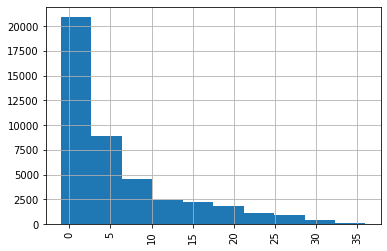

In [127]:
nye_enheter['Diff ELMA ER'].sort_values().astype('timedelta64[M]').hist(xrot='vertical')

In [128]:
nye_enheter['Diff ELMA ER MND'] = nye_enheter['Diff ELMA ER'].astype('timedelta64[M]')

/tmp/ipykernel_20463/1131878824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nye_enheter['Diff ELMA ER MND'] = nye_enheter['Diff ELMA ER'].astype('timedelta64[M]')


In [125]:
nye_enheter[['Diff ELMA ER', 'Antall ansatte']].sort_values(by='Diff ELMA ER')

,Diff ELMA ER,Antall ansatte
Organisasjonsnummer,,
925850497,-7 days,19
825957022,-5 days,0
926275909,-5 days,0
926391984,-4 days,4
926561928,-3 days,0
...,...,...
923378340,NaT,0
928194159,NaT,0
828008242,NaT,0


array([[<AxesSubplot:title={'center':'Diff ELMA ER MND'}>,
        <AxesSubplot:title={'center':'Antall ansatte'}>]], dtype=object)

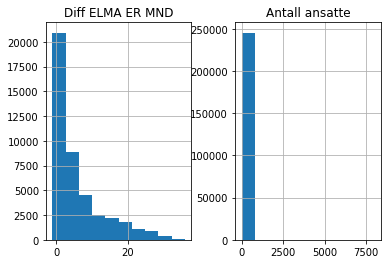

In [130]:
nye_enheter[['Diff ELMA ER MND', 'Antall ansatte']].hist()

<AxesSubplot:>

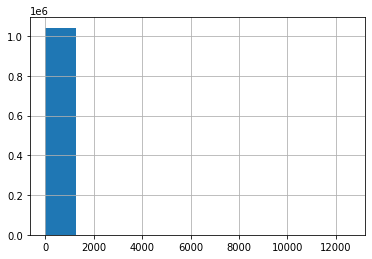

In [158]:
enheter[(enheter['Antall ansatte'] < 11) | (enheter['Organisasjonsform.kode'] == 'AS')]['Antall ansatte'].hist()

In [86]:
%pip install matplotlib

     |████████████████████████████████| 11.2 MB 2.5 MB/s            
     |████████████████████████████████| 880 kB 41.3 MB/s            
     |████████████████████████████████| 1.6 MB 43.6 MB/s            
     |████████████████████████████████| 3.1 MB 42.6 MB/s            
     |████████████████████████████████| 97 kB 5.8 MB/s             
     |████████████████████████████████| 40 kB 4.6 MB/s             
Note: you may need to restart the kernel to use updated packages.
